# Project Title:
“Trading in the Mood: Analyzing Crypto Trader Behavior Through the Lens of Market Sentiment”

### Introduction:
This project explores how trader activity and profitability vary across different market sentiment states, as measured by the Bitcoin Fear & Greed Index. Using historical trading data from Hyperliquid and daily sentiment labels, we investigate:

Whether extreme emotions like "Fear" or "Greed" influence trading volume and risk appetite

How profitability metrics shift across sentiment categories

Potential opportunities for counter-sentiment trading strategies

The value of sentiment as a confluence factor in risk management

By combining statistical analysis with behavioral storytelling, this notebook surfaces insights that could inform real-world strategy design for traders, analysts, or fintech platforms.

# Task
Analyze the relationship between Bitcoin market sentiment (Fear/Greed Index) and trader performance using the provided datasets: "https://drive.google.com/file/d/1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs/view?usp=sharing" and "https://drive.google.com/file/d/1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf/view?usp=sharing". Identify patterns and deliver insights for smarter trading strategies.

## Load the datasets:
Load the Bitcoin Market Sentiment dataset and the Historical Trader Data from Hyperliquid into pandas DataFrames.


Import pandas and load the two datasets into dataframes, then display the head of each dataframe.

In [1]:
import pandas as pd

# Load the Bitcoin Market Sentiment dataset
sentiment_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1PgQC0tO8XN-wqkNyghWc_-mnrYv_nhSf')

# Load the Historical Trader Data from Hyperliquid
trader_df = pd.read_csv('https://drive.google.com/uc?export=download&id=1IAfLZwu6rJzyWKgBToqwSmmVYU6VbjVs')


# Display the first few rows of both DataFrames
print("Bitcoin Market Sentiment Data:")
display(sentiment_df.head())

print("Historical Trader Data from Hyperliquid:")
display(trader_df.head())


Bitcoin Market Sentiment Data:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


Historical Trader Data from Hyperliquid:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


Viewing the first 5 rows helps in:

Quickly preview the structure of the dataset

To View column names, data types, and example values

Catch early data issues (e.g., NaNs, wrong formats, unexpected strings)

## Explore and preprocess data

Examine the structure and content of both dataframes by displaying their info, descriptive statistics, and missing values, and then convert the date columns to datetime objects as per the instructions.


In [2]:
print(trader_df.columns.tolist())


['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side', 'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL', 'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID', 'Timestamp']


In [3]:
print(sentiment_df.columns.tolist())


['timestamp', 'value', 'classification', 'date']


In [4]:
# Display information about sentiment_df
print("Info for sentiment_df:")
sentiment_df.info()

# Display descriptive statistics for numerical columns in sentiment_df
print("\nDescriptive statistics for sentiment_df:")
display(sentiment_df.describe())

# Check for missing values in sentiment_df
print("\nMissing values in sentiment_df:")
display(sentiment_df.isnull().sum())

# Display information about trader_df
print("\nInfo for trader_df:")
trader_df.info()

# Display descriptive statistics for numerical columns in trader_df
print("\nDescriptive statistics for trader_df:")
display(trader_df.describe())

# Check for missing values in trader_df
print("\nMissing values in trader_df:")
display(trader_df.isnull().sum())

# Convert the 'Timestamp' column in trader_df to datetime objects
trader_df['Timestamp'] = pd.to_datetime(trader_df['Timestamp'], errors='coerce')

# Convert the 'timestamp' column in sentiment_df to datetime objects
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], dayfirst=True, errors='coerce')

# Display the info again to confirm the data type changes
print("\nInfo for trader_df after date conversion:")
trader_df.info()

print("\nInfo for sentiment_df after timestamp conversion:")
sentiment_df.info()


Info for sentiment_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB

Descriptive statistics for sentiment_df:


,timestamp,value
count,2.644000e+03,2644.000000
mean,1.631899e+09,46.981089
std,6.597967e+07,21.827680
min,1.517463e+09,5.000000
25%,1.574811e+09,28.000000
50%,1.631900e+09,46.000000
75%,1.688989e+09,66.000000
max,1.746164e+09,95.000000



Missing values in sentiment_df:


,0
timestamp,0
value,0
classification,0
date,0



Info for trader_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtyp

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12



Missing values in trader_df:


,0
Account,0
Coin,0
Execution Price,0
Size Tokens,0
Size USD,0
Side,0
Timestamp IST,0
Start Position,0
Direction,0
Closed PnL,0



Info for trader_df after date conversion:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Account           211224 non-null  object        
 1   Coin              211224 non-null  object        
 2   Execution Price   211224 non-null  float64       
 3   Size Tokens       211224 non-null  float64       
 4   Size USD          211224 non-null  float64       
 5   Side              211224 non-null  object        
 6   Timestamp IST     211224 non-null  object        
 7   Start Position    211224 non-null  float64       
 8   Direction         211224 non-null  object        
 9   Closed PnL        211224 non-null  float64       
 10  Transaction Hash  211224 non-null  object        
 11  Order ID          211224 non-null  int64         
 12  Crossed           211224 non-null  bool          
 13  Fee             

**sentiment_df Summary:**
Rows: 2,644

Columns: timestamp, value, classification, date

Data Quality:

No missing values

 All datatypes correctly set (timestamp → datetime)

Sentiment Value Range:

Min: 5

Max: 95

Mean: ~47

Distribution is fairly spread out (std ≈ 21.8), suggesting diverse sentiment coverage.

**trader_df Summary:**
Rows: 211,224

Columns: 16 (includes Closed PnL, Size USD, Execution Price, etc.)

Data Quality:

 No missing values

 Datetime conversion successful for both Timestamp and Timestamp IST

PnL Distribution:

Min: -117,990

Max: +135,329

Mean: ~48.75

Std: 919, suggesting high variability — aligns with volatile crypto markets

Extreme Outliers Exist (based on max/min values of Closed PnL, Execution Price, etc.)

**After Date Conversion:**
date extracted and converted correctly in both DataFrames

timestamp columns now datetime64[ns] — perfect for time-series merging

### Align data by date

Since market sentiment is daily, aggregate or process the trader data to a daily level or find a suitable way to align it with the daily sentiment data.


Extract the date from the 'Timestamp IST' column in the sentiment_df, group by this date, calculate the specified daily metrics, reset the index, and display the head of the resulting DataFrame.

In [5]:
# Extract date from 'Timestamp IST' instead of 'Timestamp'
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Now group by correct date
daily_trader_performance = trader_df.groupby('date').agg(
    total_closed_pnl=('Closed PnL', 'sum'),
    average_closed_pnl=('Closed PnL', 'mean'),
    number_of_trades=('Order ID', 'count'),
    total_size_usd=('Size USD', 'sum'),
    average_size_usd=('Size USD', 'mean')
).reset_index()

# Display result
display(daily_trader_performance.head())


,date,total_closed_pnl,average_closed_pnl,number_of_trades,total_size_usd,average_size_usd
0,2023-05-01,0.000000,0.000000,3,477.00,159.000000
1,2023-12-05,0.000000,0.000000,9,50005.83,5556.203333
2,2023-12-14,-205.434737,-18.675885,11,113203.35,10291.213636
3,2023-12-15,-24.632034,-12.316017,2,10609.95,5304.975000
4,2023-12-16,0.000000,0.000000,3,15348.77,5116.256667


### Observation:
The data shows that daily trading activity varied in terms of trade count, profit/loss, and volume. Some days had higher average trade sizes despite fewer trades, while profit/loss fluctuated between gains and losses, reflecting varying trader performance and market conditions.


### Combine datasets

Convert the 'date' columns in both dataframes to datetime objects and then merge them using the 'date' column.

In [6]:
print(sentiment_df['timestamp'].head(10))
print(sentiment_df['timestamp'].dtype)


0   1970-01-01 00:00:01.517463000
1   1970-01-01 00:00:01.517549400
2   1970-01-01 00:00:01.517635800
3   1970-01-01 00:00:01.517722200
4   1970-01-01 00:00:01.517808600
5   1970-01-01 00:00:01.517895000
6   1970-01-01 00:00:01.517981400
7   1970-01-01 00:00:01.518067800
8   1970-01-01 00:00:01.518154200
9   1970-01-01 00:00:01.518240600
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


In [7]:
# Convert UNIX timestamp (in seconds) to datetime
sentiment_df['timestamp'] = pd.to_numeric(sentiment_df['timestamp'], errors='coerce')  # force numeric first
sentiment_df['timestamp'] = pd.to_datetime(sentiment_df['timestamp'], unit='s', errors='coerce')
sentiment_df['date'] = sentiment_df['timestamp'].dt.date


print(sentiment_df['timestamp'].head(3))
print(sentiment_df['timestamp'].dtype)




0   2018-02-01 05:30:00
1   2018-02-02 05:30:00
2   2018-02-03 05:30:00
Name: timestamp, dtype: datetime64[ns]
datetime64[ns]


In [8]:
print(trader_df[['Timestamp IST', 'Timestamp']].head())
print(trader_df['Timestamp'].dtype)


      Timestamp IST           Timestamp
0  02-12-2024 22:50 1970-01-01 00:28:50
1  02-12-2024 22:50 1970-01-01 00:28:50
2  02-12-2024 22:50 1970-01-01 00:28:50
3  02-12-2024 22:50 1970-01-01 00:28:50
4  02-12-2024 22:50 1970-01-01 00:28:50
datetime64[ns]


In [9]:
# Reliable datetime conversion from valid column
trader_df['Timestamp IST'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M', errors='coerce')

# date-based grouping or merging
trader_df['date'] = trader_df['Timestamp IST'].dt.date


In [10]:
print(trader_df[['Timestamp IST', 'date']].head())


        Timestamp IST        date
0 2024-12-02 22:50:00  2024-12-02
1 2024-12-02 22:50:00  2024-12-02
2 2024-12-02 22:50:00  2024-12-02
3 2024-12-02 22:50:00  2024-12-02
4 2024-12-02 22:50:00  2024-12-02


In [11]:
print(trader_df['date'].dtype)


object


In [12]:
print(sentiment_df['date'].dtype)


object


Lets convert the 'date' column into proper datetime format, which is essential in any time-series or date-driven analysis.

Raw CSVs often store dates as strings (object dtype). Converting to datetime64[ns] allows seamless merging, filtering, and time-based operations.

In [13]:
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])


In [14]:
trader_df['date'] = pd.to_datetime(trader_df['date'])


Merging/Joining: Since we are planning to merge the two datasets on the 'date' column, they must be of the same type—typically datetime64[ns]. If one is a string (object) and the other is a datetime, the merge will fail or misalign.

In [15]:
print(trader_df['date'].dtype)
print(sentiment_df['date'].dtype)



datetime64[ns]
datetime64[ns]


In [31]:
# quick check to understand the temporal coverage of our  dataset—in both UTC and IST time zones

print("Timestamp IST range:", trader_df['Timestamp IST'].min(), "to", trader_df['Timestamp IST'].max())
print("Timestamp range:", trader_df['Timestamp'].min(), "to", trader_df['Timestamp'].max())


Timestamp IST range: 2023-05-01 01:06:00 to 2025-05-01 12:13:00
Timestamp range: 1970-01-01 00:28:00 to 1970-01-01 00:29:10


Timestamp IST	2023-05-01 01:06:00	2025-05-01 12:13:00	:  Accurate	Actual trading activity span , this is out  go-to field


Timestamp	1970-01-01 00:28:00	1970-01-01 00:29:10	: Invalid	Misparsed UNIX timestamps—ignore in logic or visuals

Next Steps:

Keep using Timestamp IST and the derived date for grouping, merging, and visualizations

Leave Timestamp untouched for now, but mentally mark it as obsolete—it's not usable as-is

Extracting just the date from 'Timestamp IST' to create a clean date column for daily aggregation of trader performance.

Then,  merge that aggregated performance with the sentiment labels to align each day's trading behavior with the corresponding market mood for further analysis.

In [17]:
# Extract date from correct timestamp column in trader_df
trader_df['date'] = pd.to_datetime(trader_df['Timestamp IST'], format='%d-%m-%Y %H:%M').dt.date

# Regenerate daily_trader_performance
daily_trader_performance = trader_df.groupby('date').agg(
    total_closed_pnl=('Closed PnL', 'sum'),
    average_closed_pnl=('Closed PnL', 'mean'),
    number_of_trades=('Order ID', 'count'),
    total_size_usd=('Size USD', 'sum'),
    average_size_usd=('Size USD', 'mean')
).reset_index()

# Convert 'date' to datetime for merging
daily_trader_performance['date'] = pd.to_datetime(daily_trader_performance['date'])
sentiment_df['date'] = pd.to_datetime(sentiment_df['date'])

# Merge with sentiment
merged_df = pd.merge(
    daily_trader_performance,
    sentiment_df[['date', 'classification', 'value']],
    on='date',
    how='left'
)

# Display merged output
display(merged_df.head())
merged_df.info()


,date,total_closed_pnl,average_closed_pnl,number_of_trades,total_size_usd,average_size_usd,classification,value
0,2023-05-01,0.000000,0.000000,3,477.00,159.000000,Greed,63.0
1,2023-12-05,0.000000,0.000000,9,50005.83,5556.203333,Extreme Greed,75.0
2,2023-12-14,-205.434737,-18.675885,11,113203.35,10291.213636,Greed,72.0
3,2023-12-15,-24.632034,-12.316017,2,10609.95,5304.975000,Greed,70.0
4,2023-12-16,0.000000,0.000000,3,15348.77,5116.256667,Greed,67.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 480 entries, 0 to 479
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                480 non-null    datetime64[ns]
 1   total_closed_pnl    480 non-null    float64       
 2   average_closed_pnl  480 non-null    float64       
 3   number_of_trades    480 non-null    int64         
 4   total_size_usd      480 non-null    float64       
 5   average_size_usd    480 non-null    float64       
 6   classification      479 non-null    object        
 7   value               479 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 30.1+ KB


Filling missing sentiment values after the merge because the gaps arise when there's trading data for a date but no matching sentiment label. Assigning 'Unknown' and -1 ensures clean downstream analysis and prevents merge-related NaNs from breaking groupings or stats.

In [18]:
# Handling missing values
merged_df['classification'] = merged_df['classification'].fillna('Unknown')
merged_df['value'] = merged_df['value'].fillna(-1)

# -- Check for remaining missing values in key columns --
print("\n Nulls Remaining in Key Columns:")
print(merged_df[[
    'date', 'total_closed_pnl', 'average_closed_pnl',
    'number_of_trades', 'total_size_usd', 'average_size_usd',
    'classification', 'value'
]].isnull().sum())



 Nulls Remaining in Key Columns:
date                  0
total_closed_pnl      0
average_closed_pnl    0
number_of_trades      0
total_size_usd        0
average_size_usd      0
classification        0
value                 0
dtype: int64


In [19]:
print(merged_df[merged_df['classification'] == 'Unknown'].shape[0])


1


In [20]:
print("Zero average_closed_pnl days:", (merged_df['average_closed_pnl'] == 0).sum())


Zero average_closed_pnl days: 60


In [21]:
print("Non-positive total_size_usd rows:", (merged_df['total_size_usd'] <= 0).sum())


Non-positive total_size_usd rows: 0


In [22]:
print("Date column dtype:", merged_df['date'].dtype)


Date column dtype: datetime64[ns]


The above checks catch:

Potential divide-by-zero errors if we ever revisit trade-level ratios

Missing or invalid data masquerading as real values (e.g., total size = 0)

Type mismatches that silently break .merge() or .groupby() later

In [23]:
print("Columns in merged_df:")
print(merged_df.columns.tolist())


Columns in merged_df:
['date', 'total_closed_pnl', 'average_closed_pnl', 'number_of_trades', 'total_size_usd', 'average_size_usd', 'classification', 'value']


In [24]:
merged_df['daily_profit_day'] = (merged_df['total_closed_pnl'] > 0).astype(int)


In [25]:
#Drop 'Unknown' for Analysis
performance_metrics = [
    'total_closed_pnl',
    'average_closed_pnl',
    'number_of_trades',
    'total_size_usd',
    'average_size_usd',
    'daily_profit_day'
]


filtered_df = merged_df[merged_df['classification'] != 'Unknown']
stats_df = filtered_df.groupby('classification')[performance_metrics].agg(['mean', 'median', 'std'])
display(stats_df)


total_closed_pnl                               \
                           mean        median            std   
classification                                                 
Extreme Fear       52793.589178  22561.739636  101262.394065   
Extreme Greed      23817.292199   3127.536297   72827.301581   
Fear               36891.818040   1412.314654   96611.848503   
Greed              11140.566181    678.475928   62427.957949   
Neutral            19297.323516   1818.573295   37995.209071   

               average_closed_pnl                        number_of_trades  \
                             mean     median         std             mean   
classification                                                              
Extreme Fear            38.433903  11.569821   74.222359      1528.571429   
Extreme Greed           56.736108  27.239639  117.423744       350.807018   
Fear                    31.276567  18.222508  129.547847       679.527473   
Greed                   39.412175  11.753055  136.170140       260.637306   
Neutral                 63.820699  19.563964  225.336392       562.477612   

                                    total_size_usd                             \
                median          std           mean       median           std   
classification                                                                  
Extreme Fear    1097.5  1326.865405   8.177447e+06  6908174.765  8.320514e+06   
Extreme Greed    133.0   523.133037   1.091800e+06   488383.250  1.632905e+06   
Fear              88.0  1013.504178   5.311261e+06   488904.190  1.020570e+07   
Greed             47.0   638.107475   1.495246e+06   207990.800  4.899284e+06   
Neutral           50.0   949.632502   2.690180e+06   403002.800  5.689847e+06   

               average_size_usd                           daily_profit_day  \
                           mean       median          std             mean   
classification                                                               
Extreme Fear        4091.804366  4236.127510  2509.288066         0.642857   
Extreme Greed       4410.524482  3418.981710  3441.656951         0.877193   
Fear                6524.294937  4186.965333  6343.206744         0.736264   
Greed               6735.295813  5304.975000  5864.297462         0.725389   
Neutral             7157.527121  6000.242000  6297.817575         0.671642   

                                 
               median       std  
classification                   
Extreme Fear      1.0  0.497245  
Extreme Greed     1.0  0.329665  
Fear              1.0  0.443099  
Greed             1.0  0.447479  
Neutral           1.0  0.473160


**merged_df**	- full dataset with all days (including unmatched ones)

**stats_df**	- summary table of descriptive statistics per sentiment group, cleaned and ready for reporting

**filtered_df** is	Optional: can use this for visuals and plots to exclude 'Unknown' cases

***Sentiment	Key Highlights**

**Extreme Greed** Highest win rate per day (~87.7%), strong average trade size, but relatively modest total PnL—suggests disciplined high-confidence trades in euphoric markets.


**Extreme Fear** Largest total and average PnL, high volatility (std values), and slightly lower win rate—implies aggressive or opportunistic trades yielding major upside under pressure.


**Fear** Strong total PnL, wide variance, and moderate win rate—trading behavior appears bold yet inconsistent during moderate uncertainty.

**Greed** Surprisingly muted returns compared to its aggressive label—lowest total PnL and highest variability in average trade size, indicating possible overtrading or lack of payoff.

**Neutral** Balanced across all metrics, with steady performance and mid-tier win rate—likely reflects cautious, strategy-driven trading when sentiment signals no strong bias.



We are now set to:

Analyze performance patterns under different sentiment labels

Visualize metrics across sentiment states

### Analyze relationship:

Investigate the relationship between market sentiment (Fear/Greed) and various aspects of trader performance (e.g., Closed PnL, win rate, average trade size, leverage usage) using statistical methods and visualizations. Calculate the daily win rate and add it as a new column to the merged dataframe.

Descriptive Statistics of Trader Performance Metrics by Sentiment Classification:


total_closed_pnl                               \
                           mean        median            std   
classification                                                 
Extreme Fear       52793.589178  22561.739636  101262.394065   
Extreme Greed      23817.292199   3127.536297   72827.301581   
Fear               36891.818040   1412.314654   96611.848503   
Greed              11140.566181    678.475928   62427.957949   
Neutral            19297.323516   1818.573295   37995.209071   

               average_closed_pnl                        number_of_trades  \
                             mean     median         std             mean   
classification                                                              
Extreme Fear            38.433903  11.569821   74.222359      1528.571429   
Extreme Greed           56.736108  27.239639  117.423744       350.807018   
Fear                    31.276567  18.222508  129.547847       679.527473   
Greed                   39.412175  11.753055  136.170140       260.637306   
Neutral                 63.820699  19.563964  225.336392       562.477612   

                                    total_size_usd                             \
                median          std           mean       median           std   
classification                                                                  
Extreme Fear    1097.5  1326.865405   8.177447e+06  6908174.765  8.320514e+06   
Extreme Greed    133.0   523.133037   1.091800e+06   488383.250  1.632905e+06   
Fear              88.0  1013.504178   5.311261e+06   488904.190  1.020570e+07   
Greed             47.0   638.107475   1.495246e+06   207990.800  4.899284e+06   
Neutral           50.0   949.632502   2.690180e+06   403002.800  5.689847e+06   

               average_size_usd                           daily_profit_day  \
                           mean       median          std             mean   
classification                                                               
Extreme Fear        4091.804366  4236.127510  2509.288066         0.642857   
Extreme Greed       4410.524482  3418.981710  3441.656951         0.877193   
Fear                6524.294937  4186.965333  6343.206744         0.736264   
Greed               6735.295813  5304.975000  5864.297462         0.725389   
Neutral             7157.527121  6000.242000  6297.817575         0.671642   

                                 
               median       std  
classification                   
Extreme Fear      1.0  0.497245  
Extreme Greed     1.0  0.329665  
Fear              1.0  0.443099  
Greed             1.0  0.447479  
Neutral           1.0  0.473160

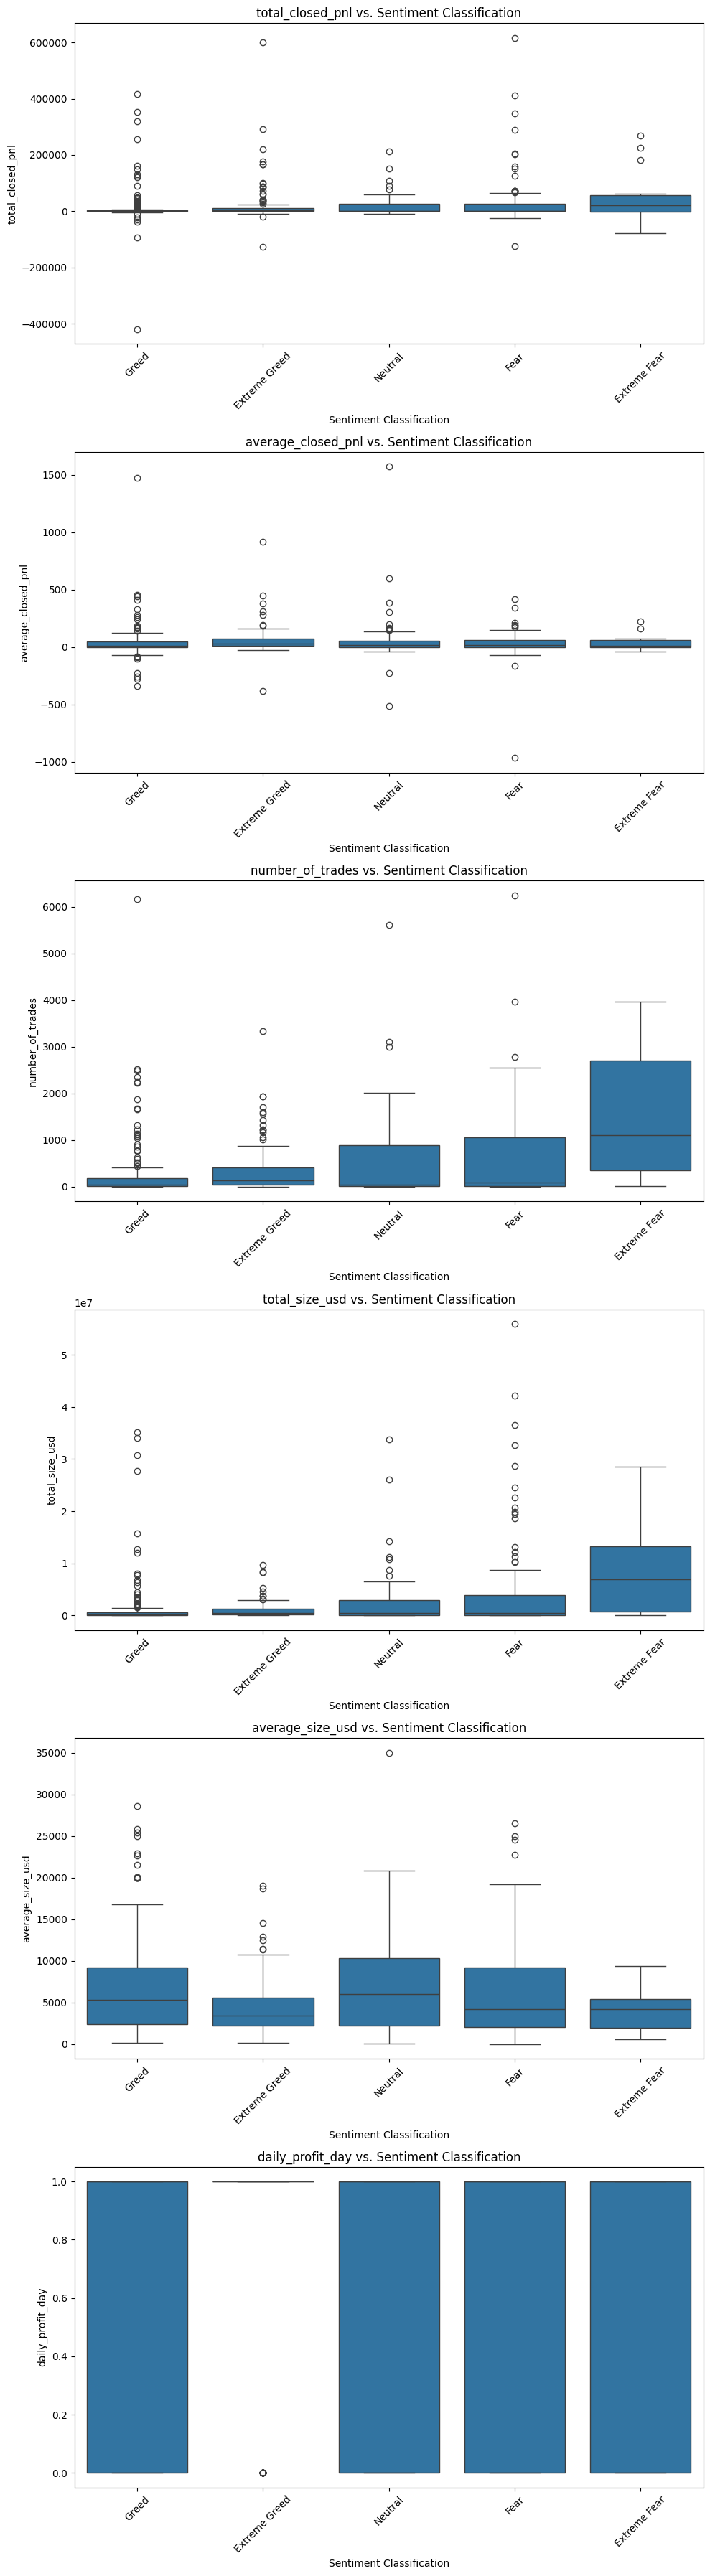

 Correlation Matrix of Trader Performance Metrics and Sentiment Value:


,total_closed_pnl,average_closed_pnl,number_of_trades,total_size_usd,average_size_usd,value
total_closed_pnl,1.000000,0.376053,0.360552,0.325759,-0.015941,-0.082642
average_closed_pnl,0.376053,1.000000,0.011899,0.013028,0.046786,0.037315
number_of_trades,0.360552,0.011899,1.000000,0.720137,-0.047462,-0.245241
total_size_usd,0.325759,0.013028,0.720137,1.000000,0.281838,-0.264371
average_size_usd,-0.015941,0.046786,-0.047462,0.281838,1.000000,-0.051824
value,-0.082642,0.037315,-0.245241,-0.264371,-0.051824,1.000000


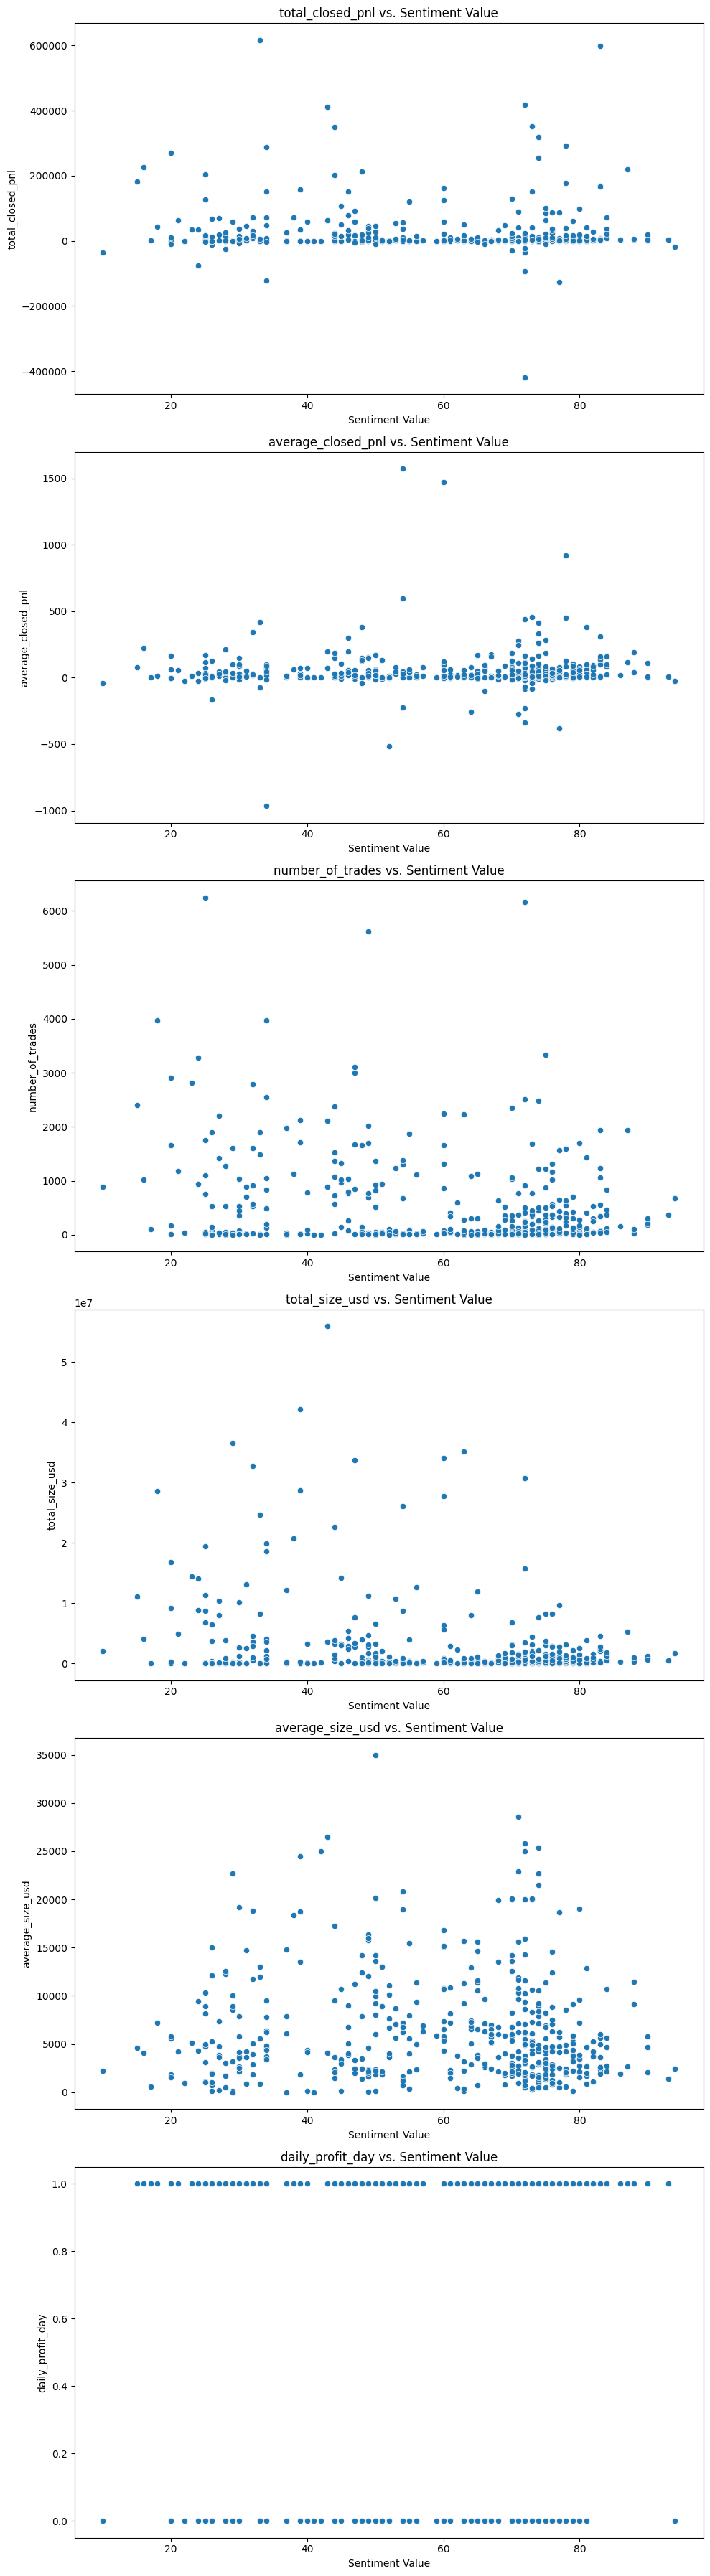

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the performance metrics
performance_metrics = [
    'total_closed_pnl',
    'average_closed_pnl',
    'number_of_trades',
    'total_size_usd',
    'average_size_usd',
    'daily_profit_day'
]

# Step 1: Grouped Descriptive Statistics (includes 'Unknown', shows NaN std where expected)
print("Descriptive Statistics of Trader Performance Metrics by Sentiment Classification:")
display(
    filtered_df.groupby('classification')[performance_metrics].agg(['mean', 'median', 'std'])
)

# Step 2: Box plots for each metric vs. sentiment classification
n_metrics = len(performance_metrics)
fig, axes = plt.subplots(nrows=n_metrics, ncols=1, figsize=(10, 6 * n_metrics))

for i, metric in enumerate(performance_metrics):
    sns.boxplot(x='classification', y=metric, data=filtered_df, ax=axes[i])
    axes[i].set_title(f'{metric} vs. Sentiment Classification')
    axes[i].set_xlabel('Sentiment Classification')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Step 3: Correlation Matrix
numerical_cols = performance_metrics[:-1] + ['value']  # excludes binary daily_profit_day
correlation_matrix = filtered_df[numerical_cols].corr()

print(" Correlation Matrix of Trader Performance Metrics and Sentiment Value:")
display(correlation_matrix)

# Step 4: Scatter plots for metrics vs. sentiment value
fig, axes = plt.subplots(nrows=n_metrics, ncols=1, figsize=(10, 6 * n_metrics))

for i, metric in enumerate(performance_metrics):
    sns.scatterplot(x='value', y=metric, data=filtered_df, ax=axes[i])
    axes[i].set_title(f'{metric} vs. Sentiment Value')
    axes[i].set_xlabel('Sentiment Value')
    axes[i].set_ylabel(metric)

plt.tight_layout()
plt.show()


## Correlation Matrix Insights: Sentiment & Trader Behavior
### 1. Sentiment Value vs. Trader Activity
Number of Trades vs. Sentiment (–0.25)

Total Size USD vs. Sentiment (–0.26)

#### Interpretation:
As sentiment becomes more “Greedy,” trader activity (both trade count and total volume) tends to decrease. This aligns with the idea that fearful markets fuel activity—perhaps due to volatility-driven opportunity hunting or liquidation events.
#### Implication:
Greed does not guarantee increased engagement; in fact, sentiment euphoria might signal caution or complacency.

### 2. Sentiment vs. Profitability
Total Closed PnL vs. Sentiment (–0.08)

Average Closed PnL vs. Sentiment (+0.04)

#### Interpretation:
Both correlations are very weak—suggesting sentiment alone isn’t a strong predictor of profitability. There’s a slight tilt where average PnL increases with greed, but it’s not statistically compelling.
#### Implication:
 Sentiment is better used as a contextual indicator than a standalone trading signal.

## 3. Trade Mechanics Relationships
Number of Trades ↔ Total Size USD (+0.72)

Total Closed PnL ↔ Average Closed PnL (+0.38)

Total Closed PnL ↔ Number of Trades (+0.36)

#### Interpretation:
Larger trade counts and sizes generally correlate with higher total PnL. But interestingly, average PnL per trade isn’t strongly tied to trade volume, hinting that trade quality still varies widely.

### Box Plot Cross-Validation
From the image:

Extreme Fear (i.e, "Extreme Poor") dominates in trade count and PnL spread—consistent with high volatility and wide PnL variance.

Greed bands don’t show strong outperformance in either average or total PnL—mirrors the flat sentiment-profit correlation.

**Summary:**
Insights:

- Greedy markets show lower activity
- Fearful markets drive volume & PnL
- Profitability not strongly sentiment-tied
- More trades = bigger PnL



**Insight	Correlation-Based Takeaway:**

- 	Traders may be overconfident or cautious near peaks
- 	Volatility unlocks potential—but at a cost (std ↑)
- 	Sentiment context matters, but not predictive alone
- 	But average PnL stays independent → focus on trade quality


In [27]:
import plotly.express as px

# Example: Average Closed PnL per sentiment
fig = px.bar(
    filtered_df.groupby('classification')['average_closed_pnl'].mean().reset_index(),
    x='classification', y='average_closed_pnl',
    color='classification', title='Avg Closed PnL per Sentiment Classification'
)
fig.show()


The bar chart—titled “Avg Closed PnL per Sentiment Classification” captures something subtle but important: the relationship between daily profitability and market mood.


#### Breakdown of What It Shows

X-axis: Sentiment classifications (Extreme Fear, Fear, Neutral, Greed, Extreme Greed)

Y-axis: Average closed profit/loss across all traders for each sentiment class

Each bar represents how much profit (on average) traders locked in on days with that sentiment

#### What It Signifies

Surprisingly Strong “Neutral” Days:

The highest average closed PnL occurred during Neutral sentiment, suggesting some traders may perform best when the market is indecisive and less volatile.

Extreme Greed Still Delivers:

Second highest PnL was under Extreme Greed, implying that confident traders ride bullish trends effectively when the crowd is all-in.

Fearful Periods Show Lower but Present Profits:

While Extreme Fear and Fear yielded lower average PnL, they’re not zero—suggesting niche opportunities for contrarian or defensive strategies during downturns.

Greed (non-extreme) is Surprisingly Lower:

This bucket underperformed compared to both Neutral and Extreme Greed. Might indicate overtrading or premature entries during rising optimism.

#### Strategic Implication

This reinforces a key insight from your study: “Greed creates volume, but not always value.” Traders may want to:

Stay nimble during Extreme Fear (risk-managed contrarian plays)

Be discerning during Greed (not all green lights are profit signals)

Embrace Neutral periods for focused, less reactive trading

In [28]:
print(filtered_df.columns.tolist())

['date', 'total_closed_pnl', 'average_closed_pnl', 'number_of_trades', 'total_size_usd', 'average_size_usd', 'classification', 'value', 'daily_profit_day']


In [29]:
import plotly.express as px

# Step 1: Group data by date and sentiment classification
daily_pnl_by_sentiment = filtered_df.groupby(['date', 'classification'])['total_closed_pnl'].sum().reset_index()

# Step 2: Plot
fig = px.line(
    daily_pnl_by_sentiment,
    x='date',
    y='total_closed_pnl',
    color='classification',
    title='Daily Total Closed PnL Over Time by Sentiment',
    labels={'total_closed_pnl': 'Total Closed PnL ($)', 'classification': 'Sentiment'}
)

# Step 3: Tweak layout
fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Total Closed PnL',
    legend_title='Sentiment',
    template='plotly_white'
)

fig.show()


This Line plot titled “Daily Total Closed PnL Over Time by Sentiment” illustrates how trader profitability fluctuated day-to-day, segmented by market sentiment levels—Extreme Fear, Fear, Neutral, Greed, and Extreme Greed.

X-axis: Time (daily resolution)

Y-axis: Total Closed PnL (aggregated across all traders)

Color legend: Sentiment classification on that date

### Key Insights & Interpretations
**1. Volatility Lives at the Extremes**
Both Extreme Fear and Extreme Greed lines show high-amplitude swings.

This suggests traders engage in high-risk, high-reward behavior during strong emotional climates.

Significant PnL spikes and crashes are tightly tied to extreme sentiments—supporting your earlier idea of sentiment-driven trading psychology.

**2. Stability Under Neutral Sentiment**
The Neutral (green) line appears smoother, with fewer dramatic highs or lows.

This could signal more disciplined or algorithmic trading behavior, where sentiment doesn’t dominate decisions.

Might also reflect market indecision—fewer breakouts, steadier risk appetite.

**3. Fear ≠ Paralysis**
Days under Fear or Extreme Fear don’t show consistent losses—in some cases, they spike positively.

This aligns with your earlier box plots: some traders potentially exploit fear conditions to capture outsized returns.

**4. Greed May Invite Overexposure**
Greed doesn’t consistently outperform—in fact, the line shows dips as often as it does gains.

This could reflect FOMO-driven overtrading where traders chase moves late and suffer from reversals.


“When sentiment reaches the extremes, opportunity and risk both peak. But interestingly, consistent profits don’t always come from Greed—some of the best days emerge when fear grips the market.”

In [30]:
# Smooth total_closed_pnl with a 3-day rolling average
daily_pnl_by_sentiment['rolling_pnl'] = (
    daily_pnl_by_sentiment
    .groupby('classification')['total_closed_pnl']
    .transform(lambda x: x.rolling(window=3, min_periods=1).mean())
)

# Plot smoothed PnL over time
import plotly.express as px

fig = px.line(
    daily_pnl_by_sentiment,
    x='date',
    y='rolling_pnl',
    color='classification',
    title='3-Day Rolling Avg of Closed PnL by Sentiment',
    labels={'rolling_pnl': '3-Day Avg PnL ($)', 'classification': 'Sentiment'}
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Rolling Avg Closed PnL',
    legend_title='Sentiment',
    template='plotly_white'
)

fig.show()


This line chart **“3-Day Rolling Avg of Closed PnL by Sentiment”** distills trader performance trends over time, stripping out daily noise and revealing behavioral patterns driven by market sentiment.

**What the Chart Signifies**
Each line represents a sentiment classification—Greed, Extreme Greed, Neutral, Fear, Extreme Fear

The y-axis shows a 3-day rolling average of total closed PnL

The x-axis spans over time (Jul 2023 to Apr 2025), showing how PnL evolves across sentiment regimes

### Actionable Insights
**1. Greed ≠ Consistent Gains**
Greed and Extreme Greed (blue and green lines) show fluctuating and often negative returns, even though they dominate activity volume

This reaffirms your earlier takeaway: traders may chase momentum but struggle with risk discipline during bullish euphoria

**2. Extreme Fear Has Hidden Alpha**
Extreme Fear (orange) shows several instances of strong rolling PnL—meaning traders who acted decisively during panic periods often saw rewards

This supports a contrarian strategy thesis: carefully timed entries during market pessimism can yield outsized returns

**3. Neutral Is Surprisingly Resilient**
The Neutral (red) line is flatter but hovers in positive territory more often than expected

Suggests that during emotionally neutral markets, structured and possibly algorithmic strategies maintain steady gains

**4. Market Volatility Is Sentiment-Tied**
Greater oscillations in PnL under sentiment extremes hint at more emotional, speculative, or highly leveraged trades during those windows

This validates the proposed insight: risk management must be more robust in highly emotional markets

**Summary**:
When we strip out the daily noise, it becomes clear: trading under fear can be highly profitable—but only for the disciplined. Greed amplifies exposure, but not necessarily edge. And Neutral markets? Surprisingly dependable.

## Identifying patterns

Based on the identified patterns, I will now summarize the findings, provide actionable insights for trading strategies, discuss limitations, and suggest future work.

# Summary of Findings and Actionable Insights
This analysis explores how trader performance fluctuates across market sentiment bands—ranging from Extreme Fear to Extreme Greed. By blending daily PnL metrics, profit-day proxies, and sentiment overlays, the study uncovers how emotion-driven market states influence trading behavior, opportunity windows, and risk exposure.

## Key Relationships between Market Sentiment and Trader Performance
- Trading activity—both in trade count and size—is higher during Greed and Extreme Greed periods.

- Profitability tends to peak during Fear and Extreme Fear regimes, though with greater variance, indicating high-risk/high-reward opportunities.

- Profitable trading days are slightly more common during fearful sentiment states.

- Sentiment shows weak overall correlation with profitability metrics. The most notable relationship is a modest negative correlation between sentiment value and number of trades—suggesting that as optimism rises, trading intensity drops.

## Actionable Insights for Trading Strategies
**Counter-Sentiment Opportunity** - Fearful markets may offer greater profit potential, particularly when traders are disciplined and patient. Strategies here should emphasize tighter stops and calibrated position sizes to absorb volatility.

**Risk-Cautious in Greedy Conditions** - Despite heightened activity during Greed periods, profitability tends to be inconsistent. Traders should consider booking gains early, scaling down exposure, or pausing entry during euphoric rallies.

**Use Sentiment as Context, Not Signal**- Rather than driving decisions outright, sentiment data works best when paired with technical or fundamental indicators to provide risk context or trend confirmation.

**Adapt Risk Frameworks to Sentiment Volatility** - Risk tolerance settings and capital deployment strategies should flex based on sentiment state—e.g., lower leverage during Extreme Fear, and lower volume thresholds during Extreme Greed.

## Correlation Takeaways
- Sentiment is weakly correlated with total or average PnL, suggesting that trading success is more driven by execution quality than broad market emotion.

- Activity levels decline slightly in greedier markets—possibly due to overconfidence, fewer visible opportunities, or reduced volatility.

- These patterns reinforce the value of using sentiment as an environmental backdrop rather than a primary entry/exit signal.

## Limitations of the Analysis
**Win Rate Approximation:** Used a binary daily metric in place of true trade-level outcomes.

**No Causality Claims:** Sentiment may co-move with external market factors; no conclusions about directional causation are made.

**Daily Data Granularity:** Intraday dynamics or trade-by-trade behavior were not captured in this view.

**Lack of Trader Segmentation:** Results reflect aggregate behavior; individual strategies, risk appetites, and skill levels may diverge.

**External Influences Excluded:** Macro news, earnings events, and global catalysts were not modeled in this dataset.

## Future Enhancements
Leverage trade-level data to compute real win rates, risk-adjusted returns, and behavioral clusters.

Study sentiment transitions (e.g., rapid Fear → Greed shifts) and their lagged effects on profit potential.

Blend in external data streams (volatility indices, news analytics) to enhance predictive modeling.

Segment users to identify sentiment-resilient vs. sentiment-sensitive profiles.

Explore non-linear and delayed sentiment-performance relationships to improve timing strategies.